<a href="https://colab.research.google.com/github/coolkite/machine_translation/blob/main/English%20To%20Spanish/%20English%20To%20Spanish%20Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.preprocessing import *
from keras.models import Model, load_model
from keras.layers import *
from keras.utils import *
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [ ]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
tf.compat.v1.enable_eager_execution()


In [ ]:
!pip install --upgrade numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

tf.keras.backend.clear_session()
model = load_model("/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/engToSpaFin.h5")


THIS CELL SHOULD BE RAN FIRST


In [ ]:
import tensorflow as tf
tf.compat.v1.enable_eager_execution()



THIS CELL SHOULD BE RAN FIRST

In [ ]:
import tensorflow as tf
print(tf.executing_eagerly())


True


In [ ]:
model = load_model("/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/engToSpaFin.h5")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 72)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 72, 300)      4290900     ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 70)]         0           []                               
                                                                                                  
 gru (GRU)                      [(None, 72, 300),    541800      ['embedding[0][0]']              
                                 (None, 300)]                                                 

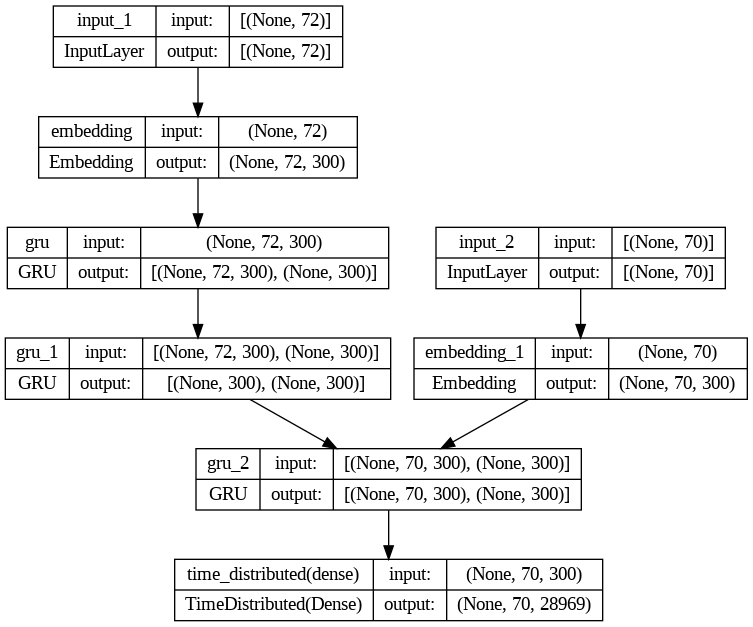

In [ ]:
model.summary()
plot_model(model, to_file='model.png', show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 72)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 72, 300)      4290900     ['input_1[0][0]']                
                                                                                                  
 gru (GRU)                      [(None, 72, 300),    541800      ['embedding[1][0]']              
                                 (None, 300)]                                                     
                                                                                                  
 gru_1 (GRU)                    [(None, 300),        541800      ['gru[1][0]',                

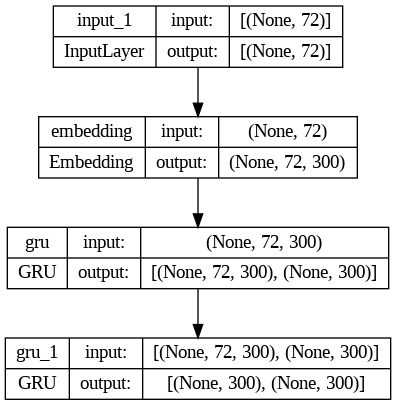

In [ ]:
encoder_input = model.input[0]
encoder_embedding = model.layers[1](encoder_input)
mid_encoder_layer = model.layers[3](encoder_embedding)
encoder_output, encoder_hidden = model.layers[5](mid_encoder_layer)
encoder_model = Model(encoder_input, encoder_hidden)
encoder_model.summary()
plot_model(encoder_model, to_file='enc_model.png', show_shapes=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 70)]         0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 70, 300)      8691000     ['input_2[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 gru_2 (GRU)                    [(None, 70, 300),    541800      ['embedding_1[1][0]',            
                                 (None, 300)]                     'input_3[0][0]']          

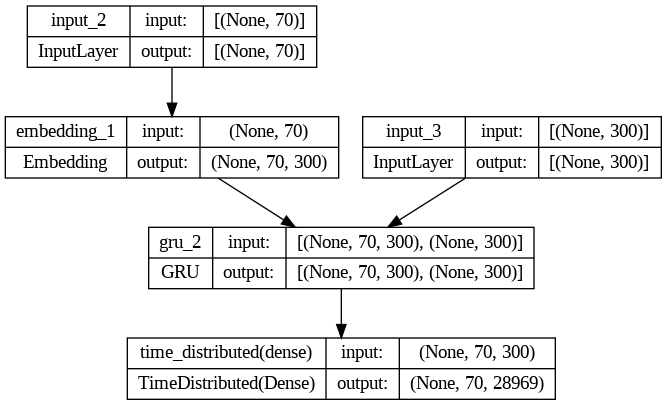

In [ ]:
decoder_input = model.inputs[1]
initial_decoder_state = Input(shape=(300,), name='input_3')
decoder_embedding = model.layers[4](decoder_input)
decoder_output, dec_hid_state = model.layers[6](decoder_embedding, initial_state = initial_decoder_state)
decoder_dense = model.layers[7](decoder_output)

decoder_model = Model([decoder_input] + [initial_decoder_state], [decoder_dense] + [dec_hid_state])
decoder_model.summary()
plot_model(decoder_model, to_file='dec_model.png', show_shapes=True)

for the back tracking from value to key and key to value

In [ ]:
from tensorflow.python.ops.gen_array_ops import reverse
import pickle
with open('/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/engTokenizer.pickle', 'rb') as handle:
    eng_dict = pickle.load(handle)
with open('/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/spaTokenizer.pickle', 'rb') as handle:
    spa_dict = pickle.load(handle)
reverse_spa_dict = {value:key for key, value in spa_dict.items()}
print(eng_dict)
print(spa_dict)
print(reverse_spa_dict)

{'bos': 1, 'eos': 2, 'i': 3, 'the': 4, 'to': 5, 'you': 6, 'tom': 7, 'a': 8, 'is': 9, 'he': 10, 'in': 11, 'that': 12, 'of': 13, 'it': 14, 'do': 15, 'was': 16, 'me': 17, 'this': 18, 'have': 19, 'my': 20, "don't": 21, 'for': 22, 'are': 23, 'what': 24, 'your': 25, 'we': 26, 'she': 27, "i'm": 28, 'mary': 29, 'be': 30, 'his': 31, 'on': 32, 'want': 33, 'with': 34, 'not': 35, 'and': 36, 'like': 37, 'know': 38, 'at': 39, 'can': 40, 'go': 41, 'him': 42, "it's": 43, 'has': 44, 'how': 45, 'there': 46, 'did': 47, 'her': 48, 'time': 49, 'very': 50, 'as': 51, 'they': 52, 'all': 53, 'here': 54, 'will': 55, "didn't": 56, 'about': 57, 'think': 58, 'had': 59, 'up': 60, 'get': 61, "can't": 62, 'out': 63, 'if': 64, 'one': 65, 'when': 66, 'going': 67, "you're": 68, 'no': 69, 'an': 70, 'from': 71, 'why': 72, 'were': 73, "doesn't": 74, 'good': 75, 'see': 76, "i'll": 77, 'need': 78, 'by': 79, 'come': 80, 'who': 81, 'would': 82, 'please': 83, 'so': 84, 'just': 85, 'been': 86, 'help': 87, 'more': 88, 'now': 89, 

def tokenize used to tokenize the strings in the dataset
The tokenizer assigns a unique integer to each word in the dataset and creates a word-to-index mapping, which is stored in the word_index dictionary.




In [ ]:
def tokenize(sentence, word_index):
  import re
  sentence = "<BOS> " + sentence + " <EOS>"
  sentence = sentence.lower()
  sentence = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", sentence)
  sentence = sentence.split(sep=" ")
  temp = sentence
  sentence = [word for word in temp if word != '']
  sentence = list(map(lambda key: word_index[key], sentence))
  return sentence, word_index

def padding(sentence, max_length):
  sentence = np.array(sentence)
  sentence = sentence.reshape(1,sentence.shape[0])
  sentence = pad_sequences(sentence, maxlen=max_length, padding = 'post', truncating = 'post')
  return sentence

In [ ]:
eng_max_length = 72
spa_max_length = 70

def translate(orig_sentence):
  sentence, dic = tokenize(orig_sentence, eng_dict)
  sentence = padding(sentence, eng_max_length)

  enc_vector = encoder_model.predict(sentence, verbose=0)

  prev_word = np.zeros((1,1))
  prev_word[0,0] = spa_dict["bos"]
  trans_seq = []

  while True:
    output_token, last_hidden = decoder_model.predict([prev_word]+[enc_vector], verbose=0)
    pred_token = np.argmax(output_token[0,:])
    word = reverse_spa_dict[pred_token]

    enc_vector = last_hidden
    prev_word[0,0] = pred_token

    if word == "eos":
      break

    trans_seq.append(word)

  translation = " ".join(trans_seq)
  return translation

In [ ]:
def translate(orig_sentence):
    sentence, dic = tokenize(orig_sentence, eng_dict)
    sentence = padding(sentence, eng_max_length)

    enc_vector = encoder_model.predict(sentence, verbose=0)

    prev_word = np.zeros((1,1))
    prev_word[0,0] = spa_dict["bos"]
    trans_seq = []

    while True:
        output_token, last_hidden = decoder_model.predict([prev_word]+[enc_vector], verbose=0)
        pred_token = np.argmax(output_token[0,:])
        word = reverse_spa_dict[pred_token]

        enc_vector = last_hidden
        prev_word[0,0] = pred_token

        if word == "eos":
            break

        trans_seq.append(word)

    translation = " ".join(trans_seq)
    print("Original english sentence: " + orig_sentence)
    print("Translated spanish sentence: " + translation)
    return translation


In [ ]:
def translate(orig_sentence):
    with open('/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/engTokenizer.pickle', 'rb') as handle:
        eng_dict = pickle.load(handle)
    with open('/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/spaTokenizer.pickle', 'rb') as handle:
        spa_dict = pickle.load(handle)
    reverse_spa_dict = {value:key for key, value in spa_dict.items()}

    sentence, dic = tokenize(orig_sentence, eng_dict)
    sentence = padding(sentence, eng_max_length)

    enc_vector = encoder_model.predict(sentence, verbose=0)

    prev_word = np.zeros((1,1))
    prev_word[0,0] = spa_dict["bos"]
    trans_seq = []

    while True:
        output_token, last_hidden = decoder_model.predict([prev_word]+[enc_vector], verbose=0)
        pred_token = np.argmax(output_token[0,:])
        word = reverse_spa_dict[pred_token]

        enc_vector = last_hidden
        prev_word[0,0] = pred_token

        if word == "eos":
            break

        trans_seq.append(word)

    translation = " ".join(trans_seq)
    return translation


THESE BELOW ONES NEED TO BE RUN

In [ ]:
def tokenize(sentence):
    import re
    sentence = "<BOS> " + sentence + " <EOS>"
    sentence = sentence.lower()
    sentence = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", sentence)
    sentence = sentence.split(sep=" ")
    temp = sentence
    sentence = [word for word in temp if word != '']
    sentence = list(map(lambda key: eng_dict[key], sentence))
    return sentence


def padding(sentence, max_length):
  sentence = np.array(sentence)
  sentence = sentence.reshape(1,sentence.shape[0])
  sentence = pad_sequences(sentence, maxlen=max_length, padding = 'post', truncating = 'post')
  return sentence    


This code defines a function called `translate` that takes a sentence in English as input and returns its translation in Spanish. 

The input sentence is first tokenized into a list of words and then padded to a maximum length of 72 words (which is the maximum length of an English sentence in the training dataset). 

Next, the encoder model is used to encode the input sentence into a vector representation. This vector representation is then used as the initial hidden state of the decoder model. 

The decoder model is then used to predict the next word in the Spanish translation one word at a time. The predicted word is then appended to a list of translated words. This process continues until the decoder predicts the end-of-sentence token "eos". 

Finally, the list of translated words is joined together to form the final translated sentence, which is returned by the function.

In [ ]:
eng_max_length = 72
spa_max_length = 70
def translate(orig_sentence):
    sentence = tokenize(orig_sentence)
    sentence = padding(sentence, eng_max_length)

    enc_vector = encoder_model.predict(sentence, verbose=0)

    prev_word = np.zeros((1,1))
    prev_word[0,0] = spa_dict["bos"]
    trans_seq = []

    while True:
        output_token, last_hidden = decoder_model.predict([prev_word]+[enc_vector], verbose=0)
        pred_token = np.argmax(output_token[0,:])
        word = reverse_spa_dict[pred_token]

        enc_vector = last_hidden
        prev_word[0,0] = pred_token

        if word == "eos":
            break

        trans_seq.append(word)

    translation = " ".join(trans_seq)
    return translation


In [ ]:
result = "Tom is eating"

In [ ]:
print(result)

Tom is eating


In [ ]:
orig_sentence = result
translation = translate(orig_sentence)
print("Original english sentence: " + orig_sentence)
print("Translated spanish sentence: " + translation)

Original english sentence: Tom is eating
Translated spanish sentence: tom está comiendo


In [ ]:
pip install simplejson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 6.8 MB/s eta 0:00:00


In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 14.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
print(tf.executing_eagerly())


True


In [ ]:

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


#sys.path.append('/content/models/')
sys.path.append('/content/drive/MyDrive/OCR_MODEL/')

from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

Loading segmentation models...


In [ ]:
!pip install Flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyngrok import ngrok

In [ ]:
ngrok.set_auth_token("2Oy4ae8E4dB9wOwf7LWnzN4Jmq3_RPHq9iEPttTB3Ma2rXdk")


THE BELOW CELL WORKS
main flask code


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://1524-34-86-152-219.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [05/Jun/2023 14:51:01] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Jun/2023 14:51:02] "GET /static/css/main.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Jun/2023 14:51:02] "GET /favicon.ico HTTP/1.1" 404 -


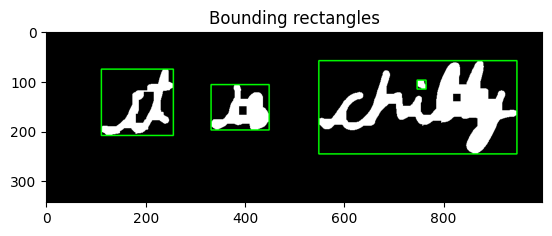

INFO:werkzeug:127.0.0.1 - - [05/Jun/2023 14:51:16] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Jun/2023 14:51:17] "GET /static/css/main.css HTTP/1.1" 404 -


(1, 21)
1/1 [==============================] - 1s 661ms/step


INFO:werkzeug:127.0.0.1 - - [05/Jun/2023 14:51:34] "GET /french HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Jun/2023 14:51:35] "GET /static/css/main.css HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [05/Jun/2023 14:51:50] "GET /spanish HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/Jun/2023 14:51:51] "GET /static/css/main.css HTTP/1.1" 404 -


In [ ]:



# HTTP_METHODS = ['GET', 'HEAD', 'POST', 'PUT', 'DELETE', 'CONNECT', 'OPTIONS', 'TRACE', 'PATCH']
from flask_ngrok import run_with_ngrok
from flask import Flask, render_template, request
import cv2
import numpy as np
import sys

app = Flask(__name__, template_folder='/content/template')
run_with_ngrok(app)


@app.route('/', methods=['GET'])
def index():
    return render_template('index_for_model_1.html')


@app.route('/', methods=['POST', 'GET'])
def predict():
    if request.method == 'POST':
        myfile = request.files['myfile']
        image_path = "/content/images/" + myfile.filename
        myfile.save(image_path)
#/content/images/WhatsApp Image 2023-05-03 at 10.39.23 PM.jpeg
        try:
            IMG = image_path  # 1, 2, 3
            LANG = 'en'
            # You can use only one of these two
            # You HABE TO train the CTC model by yourself using word_classifier_CTC.ipynb
            MODEL_LOC_CHARS = f'/content/drive/MyDrive/OCR_MODEL/ocr/model/char-clas/{LANG}/CharClassifier'
            MODEL_LOC_CTC = '/content/drive/MyDrive/OCR_MODEL/ocr/model/word-clas/CTC/Classifier1'
            CHARACTER_MODEL = Model(MODEL_LOC_CHARS)
            CTC_MODEL = Model(MODEL_LOC_CTC, 'word_prediction')

            image = cv2.cvtColor(cv2.imread(IMG), cv2.COLOR_BGR2RGB)
            # implt(image)

            # Crop image and get bounding boxes
            crop = page.detection(image)
            # implt(crop)
            boxes = words.detection(crop)
            lines = words.sort_words(boxes)

            def recognise(img):
                """Recognising words using CTC Model."""
                img = word_normalization(img, 64, border=False, tilt=False, hyst_norm=False)
                length = img.shape[1]
                # Input has shape [batch_size, height, width, 1]
                input_imgs = np.zeros((1, 64, length, 1), dtype=np.uint8)
                input_imgs[0][:, :length, 0] = img

                pred = CTC_MODEL.eval_feed({
                    'inputs:0': input_imgs,
                    'inputs_length:0': [length],
                    'keep_prob:0': 1})[0]

                word = ''
                for i in pred:
                    word += idx2char(i + 1)
                return word

            global result
            result = ""
            for line in lines:
                result += " ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line])

            return render_template('index_for_model_1.html', prediction=result)

        except Exception as e:
            print(e)
            return "Error: " + str(e)

    

    else:
        return render_template('index_for_model_1.html')


# HTTP_METHODS = ['GET', 'HEAD', 'POST', 'PUT', 'DELETE', 'CONNECT', 'OPTIONS', 'TRACE', 'PATCH']
@app.route('/french', methods=['GET'])
def french():
    global result
    if request.method == 'GET':

      

        try:
            from tensorflow import keras
            final_model = keras.models.load_model('/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/model_eng_to_french.h5')
            def final_predictions(text):
              y_id_to_word = {value: key for key, value in french_tokenizer.word_index.items()}
              y_id_to_word[0] = '<PAD>'

              sentence = [english_tokenizer.word_index[word] for word in text.split()]
              sentence = pad_sequences([sentence], maxlen=preproc_french_sentences.shape[-2], padding='post')
  
              print(sentence.shape)
              return logits_to_text(final_model.predict(sentence[:1])[0], french_tokenizer)
              
              
            txt = result.lower()

            #This code is taking a string as input, which may contain non-alphanumeric characters such as punctuation marks, and using a regular expression to replace those characters with spaces. The resulting string will only contain alphanumeric characters and spaces. This cleaned string is then passed as an argument to a function called `final_predictions()`, which is likely making some predictions or performing some task based on the cleaned input string.
            x = final_predictions(re.sub(r'[^\w]', ' ', txt))
            return render_template('index_for_model_1.html' , fre = x)
        except:
            return "there was an error"
    else:
        return "didnt happen"


@app.route('/spanish', methods = ['GET'])
def spanish():
    global result
    if request.method == 'GET':
        try:
            model = load_model("/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/engToSpaFin.h5")
            

            from tensorflow.python.ops.gen_array_ops import reverse
            import pickle
            with open('/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/engTokenizer.pickle', 'rb') as handle:
                eng_dict = pickle.load(handle)
            with open('/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/spaTokenizer.pickle', 'rb') as handle:
                spa_dict = pickle.load(handle)
            reverse_spa_dict = {value: key for key, value in spa_dict.items()}

            def tokenize(sentence):
                import re
                sentence = "<BOS> " + sentence + " <EOS>"
                sentence = sentence.lower()
                sentence = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", sentence)
                sentence = sentence.split(sep=" ")
                temp = sentence
                sentence = [word for word in temp if word != '']
                sentence = list(map(lambda key: eng_dict[key], sentence))
                return sentence

            def padding(sentence, max_length):
                sentence = np.array(sentence)
                sentence = sentence.reshape(1, sentence.shape[0])
                sentence = pad_sequences(sentence, maxlen=max_length, padding='post', truncating='post')
                return sentence    

            eng_max_length = 72
            spa_max_length = 70

            def translate(orig_sentence):
                sentence = tokenize(orig_sentence)
                sentence = padding(sentence, eng_max_length)

                enc_vector = encoder_model.predict(sentence, verbose=0)

                prev_word = np.zeros((1, 1))
                prev_word[0, 0] = spa_dict["bos"]
                trans_seq = []

                while True:
                    output_token, last_hidden = decoder_model.predict([prev_word] + [enc_vector], verbose=0)
                    pred_token = np.argmax(output_token[0, :])
                    word = reverse_spa_dict[pred_token]

                    enc_vector = last_hidden
                    prev_word[0, 0] = pred_token

                    if word == "eos":
                        break

                    trans_seq.append(word)

                translation = " ".join(trans_seq)
                return translation

            orig_sentence = result
            translation = translate(orig_sentence)
            y =  translation
            return render_template('index_for_model_1.html', spa=y)
        except:
            return "There was an error"
    else:
        return "Did not happen"







app.run()


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


In [ ]:
!pip install Keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Now importing modules
import helper
import numpy as np

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Sequential
from keras.layers import GRU, Input, Dense, TimeDistributed, Activation, RepeatVector, Bidirectional, Dropout, LSTM
from tensorflow.keras.layers import Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

In [ ]:
import tensorflow as tf

In [ ]:
english_path='https://raw.githubusercontent.com/projjal1/datasets/master/small_vocab_en.txt'
french_path='https://raw.githubusercontent.com/projjal1/datasets/master/small_vocab_fr.txt'

In [ ]:
import os

def load_data(path):
  input_file = os.path.join(path)
  with open(input_file, "r") as f:
    data = f.read()

  return data.split('\n')

In [ ]:
#Using helper to inport dataset
english_data=tf.keras.utils.get_file('file1',english_path)
french_data=tf.keras.utils.get_file('file2',french_path)

10135741/10135741 [==============================] - 0s 0us/step


In [ ]:
#Now loading data
english_sentences=load_data(english_data)
french_sentences=load_data(french_data)

In [ ]:
import collections

In [ ]:
english_words_counter = collections.Counter([word for sentence in english_sentences for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in french_sentences for word in sentence.split()])

print('English Vocab:',len(english_words_counter))
print('French Vocab:',len(french_words_counter))

English Vocab: 227
French Vocab: 355


In [ ]:
def tokenize_1(x):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(x)
  return tokenizer.texts_to_sequences(x), tokenizer

In [ ]:
# Tokenize Sample output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']

text_tokenized, text_tokenizer = tokenize_1(text_sentences)
print(text_tokenizer.word_index)
print()

for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
  print('Sequence {} in x'.format(sample_i + 1))
  print('  Input:  {}'.format(sent))
  print('  Output: {}'.format(token_sent))

{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


In [ ]:
def pad(x, length=None):
  return pad_sequences(x, maxlen=length, padding='post')

In [ ]:
def preprocess(x, y):
    """
    Preprocess x and y
    :param x: Feature List of sentences
    :param y: Label List of sentences
    :return: Tuple of (Preprocessed x, Preprocessed y, x tokenizer, y tokenizer)
    """
    preprocess_x, x_tk = tokenize_1(x)
    preprocess_y, y_tk = tokenize_1(y)

    preprocess_x = pad(preprocess_x)
    preprocess_y = pad(preprocess_y)

   
    preprocess_y = preprocess_y.reshape(*preprocess_y.shape, 1)

    return preprocess_x, preprocess_y, x_tk, y_tk

preproc_english_sentences, preproc_french_sentences, english_tokenizer, french_tokenizer =\
    preprocess(english_sentences, french_sentences)
    
max_english_sequence_length = preproc_english_sentences.shape[1]
max_french_sequence_length = preproc_french_sentences.shape[1]
english_vocab_size = len(english_tokenizer.word_index)
french_vocab_size = len(french_tokenizer.word_index)

print('Data Preprocessed')
print("Max English sentence length:", max_english_sequence_length)
print("Max French sentence length:", max_french_sequence_length)
print("English vocabulary size:", english_vocab_size)
print("French vocabulary size:", french_vocab_size)

Data Preprocessed
Max English sentence length: 15
Max French sentence length: 21
English vocabulary size: 199
French vocabulary size: 344


In [ ]:
def logits_to_text(logits, tokenizer):
  index_to_words = {id: word for word, id in tokenizer.word_index.items()}
  index_to_words[0] = '<PAD>'

  #So basically we are predicting output for a given word and then selecting best answer
  #Then selecting that label we reverse-enumerate the word from id
  return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

In [ ]:
def embed_model(input_shape, output_sequence_length, english_vocab_size, french_vocab_size):
    """
    Build and train a RNN model using word embedding on x and y
    :param input_shape: Tuple of input shape
    :param output_sequence_length: Length of output sequence
    :param english_vocab_size: Number of unique English words in the dataset
    :param french_vocab_size: Number of unique French words in the dataset
    :return: Keras model built, but not trained
    """
    # TODO: Implement

    # Hyperparameters
    learning_rate = 0.005
    
    # TODO: Build the layers
    model = Sequential()
    model.add(Embedding(english_vocab_size, 256, input_length=input_shape[1], input_shape=input_shape[1:]))
    model.add(GRU(256, return_sequences=True))    
    model.add(TimeDistributed(Dense(1024, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax'))) 

    # Compile model
    model.compile(loss=sparse_categorical_crossentropy,
                  optimizer=Adam(learning_rate),
                  metrics=['accuracy'])
    return model

In [ ]:
# Reshaping the input to work with a basic RNN
tmp_x = pad(preproc_english_sentences, preproc_french_sentences.shape[1])
tmp_x = tmp_x.reshape((-1, preproc_french_sentences.shape[-2]))

In [ ]:
simple_rnn_model = embed_model(
    tmp_x.shape,
    preproc_french_sentences.shape[1],
    len(english_tokenizer.word_index)+1,
    len(french_tokenizer.word_index)+1)

In [ ]:
from tensorflow import keras
final_model = keras.models.load_model('/content/drive/MyDrive/OCR_MODEL/eng_to_spanish/model_eng_to_french.h5')

In [ ]:
def final_predictions(text):
  y_id_to_word = {value: key for key, value in french_tokenizer.word_index.items()}
  y_id_to_word[0] = '<PAD>'

  sentence = [english_tokenizer.word_index[word] for word in text.split()]
  sentence = pad_sequences([sentence], maxlen=preproc_french_sentences.shape[-2], padding='post')
  
  print(sentence.shape)
  print(logits_to_text(final_model.predict(sentence[:1])[0], french_tokenizer))

In [ ]:
import re

In [ ]:
txt = result.lower()
final_predictions(re.sub(r'[^\w]', ' ', txt))

(1, 21)
1/1 [==============================] - 1s 502ms/step
il est froid en <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


THIS IS THE OCR PART

In [ ]:
import tensorflow as tf
print(tf.executing_eagerly())


True


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import tensorflow as tf
tf.compat.v1.enable_eager_execution()




#sys.path.append('/content/models/')
sys.path.append('/content/drive/MyDrive/OCR_MODEL/')

from ocr.normalization import word_normalization, letter_normalization
from ocr import page, words, characters
from ocr.helpers import implt, resize
from ocr.tfhelpers import Model
from ocr.datahelpers import idx2char

In [ ]:



IMG = '/content/it_is_chilly.jpeg'    # 1, 2, 3
LANG = 'en'

MODEL_LOC_CHARS = f'/content/drive/MyDrive/OCR_MODEL/ocr/model/char-clas/{LANG}/CharClassifier'
MODEL_LOC_CTC = '/content/drive/MyDrive/OCR_MODEL/ocr/model/word-clas/CTC/Classifier1'

In [ ]:



CHARACTER_MODEL = Model(MODEL_LOC_CHARS)
CTC_MODEL = Model(MODEL_LOC_CTC, 'word_prediction')

In [ ]:



image = cv2.cvtColor(cv2.imread(IMG), cv2.COLOR_BGR2RGB)
#implt(image)

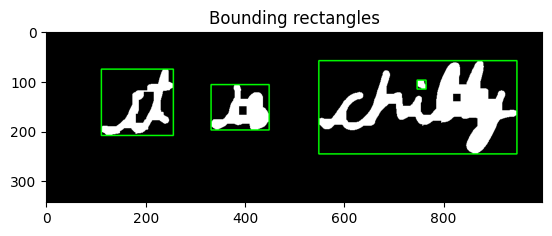

In [ ]:




crop = page.detection(image)
#implt(crop)
boxes = words.detection(crop)
lines = words.sort_words(boxes)

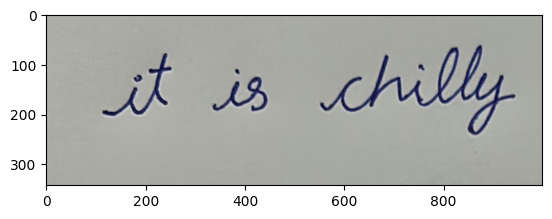

it is chilly a


In [ ]:



def recognise(img):
    """Recognising words using CTC Model."""
    img = word_normalization(
        img,
        64,
        border=False,
        tilt=False,
        hyst_norm=False)
    length = img.shape[1]
    # Input has shape [batch_size, height, width, 1]
    input_imgs = np.zeros(
            (1, 64, length, 1), dtype=np.uint8)
    input_imgs[0][:, :length, 0] = img

    pred = CTC_MODEL.eval_feed({
        'inputs:0': input_imgs,
        'inputs_length:0': [length],
        'keep_prob:0': 1})[0]

    word = ''
    for i in pred:
        word += idx2char(i + 1)
    return word

implt(crop)

for line in lines:
     x = (" ".join([recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))
     print(x)
     